In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google .colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Breast Cancer Prediction/BRCA Data.csv")

In [ ]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:

df.shape

(341, 16)

In [ ]:
# null values
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [ ]:
# drop null values
df.dropna(inplace=True)

In [ ]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:
df.shape

(317, 16)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [ ]:
df.Gender.value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [ ]:
print('Patient Status in 100%')
round(df.Patient_Status.value_counts()*100/len(df),1)

Patient Status in 100%


Patient_Status
Alive    80.4
Dead     19.6
Name: count, dtype: float64

**Visulization**

In [ ]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole =.60,
             title="Patient Status")
figure.show()

In [ ]:
stage = df["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole = 0.5,
             title="Tumour Stages of Patients")
figure.show()

In [ ]:
histology = df["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Histology of Patients")
figure.show()

In [ ]:
ER_status = df['ER status'].value_counts()
transactions = ER_status.index
quantity = ER_status.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="ER Status")
figure.show()

In [ ]:
PR_status = df['PR status'].value_counts()
transactions = PR_status.index
quantity = PR_status.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Patient Status")
figure.show()

In [ ]:
HER2_status = df['HER2 status'].value_counts()
transactions = HER2_status.index
quantity = HER2_status.values

figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="HER2 status")
figure.show()

In [ ]:

df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [ ]:
df.shape

(317, 11)

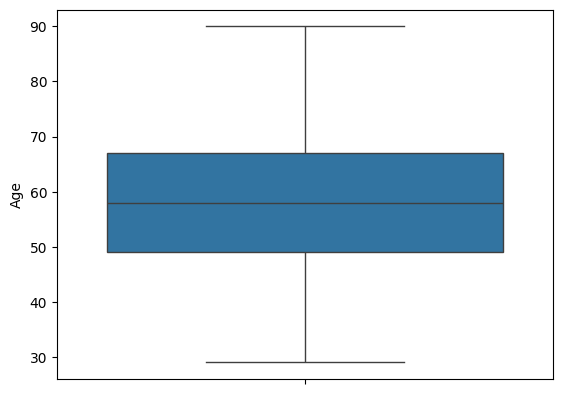

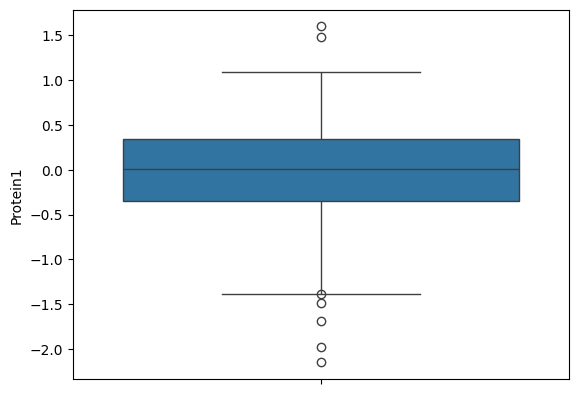

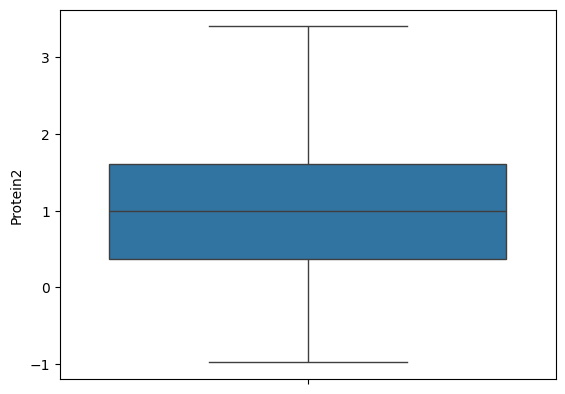

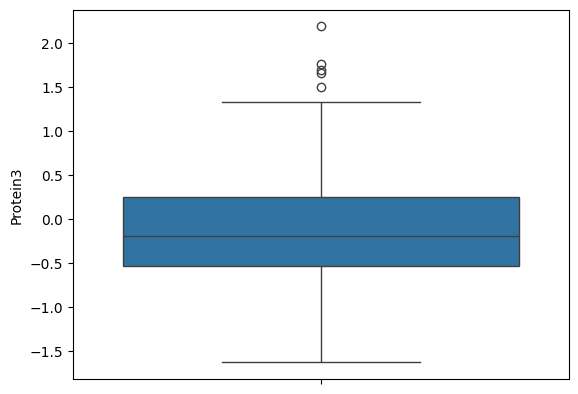

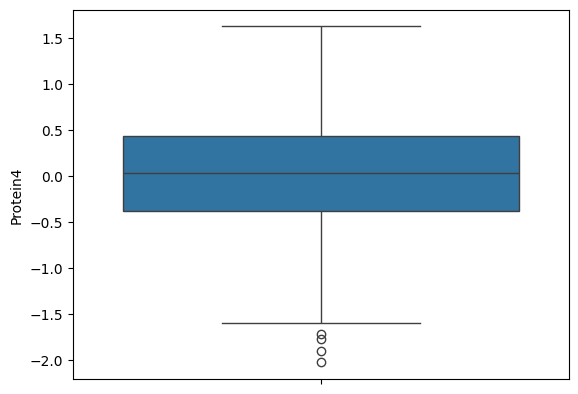

In [ ]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
    plt.figsize=(10,5)
    sns.boxplot(y = df[i])
    plt.show()

In [ ]:
!pip install pycaret
!pip install mlflow
#In machine learning, a "MlflowLogger" typically refers to a component or tool used for recording or logging information during the training process. It helps track various metrics, such as loss values, accuracy, and other performance indicators, over the course of training a machine learning model.

In [ ]:
from pycaret.classification import *

In [ ]:
cancer = setup(data = df, target = 'Patient_Status',
                  normalize = True,
                  transformation = True,
                  log_experiment = True,
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )


,Description,Value
0,Session id,7623
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Numeric features,5
9,Categorical features,5



**Buildin ML Models**

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.5988,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.4028,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.7727,0.4549,0.7727,0.6623,0.7133,-0.0784,-0.1029
3,0.7955,0.3571,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.6984,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.7964,0.5024,0.7964,0.6475,0.7141,-0.0157,-0.0206
Std,0.0145,0.1273,0.0145,0.0154,0.0116,0.0314,0.0411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X_test')


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
135,73.0,FEMALE,-0.095927,1.86420,-0.28925,-0.353040,I,Infiltrating Ductal Carcinoma,Negative,Lumpectomy
212,35.0,FEMALE,-0.817530,1.79040,-1.04160,0.038522,II,Infiltrating Lobular Carcinoma,Negative,Other
257,61.0,FEMALE,0.383060,1.65460,0.57301,0.348220,III,Infiltrating Lobular Carcinoma,Positive,Other
146,71.0,FEMALE,0.418620,-0.25258,-0.24100,-0.207630,III,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy
110,38.0,FEMALE,-0.629850,2.29990,0.11346,-1.036800,II,Infiltrating Lobular Carcinoma,Negative,Lumpectomy
...,...,...,...,...,...,...,...,...,...,...
241,49.0,FEMALE,-0.583970,-0.33272,-0.13087,-1.239100,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
228,51.0,FEMALE,-0.384660,0.80609,-1.62740,-0.512910,II,Infiltrating Ductal Carcinoma,Positive,Modified Radical Mastectomy
76,68.0,FEMALE,-0.826320,1.69120,-0.13349,-0.182140,II,Infiltrating Ductal Carcinoma,Negative,Other
130,32.0,FEMALE,0.125450,1.45650,-0.68030,-0.010378,I,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy


In [ ]:
get_config('X_test_transformed')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_II,Tumour_Stage_III,Tumour_Stage_I,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Surgery_type_Lumpectomy
135,1.057650,-0.117309,-0.170772,1.133064,-0.337147,-0.730697,-1.173177,-0.561673,2.127205,0.624449,-0.561673,-0.206041,-0.324037,-0.673756,-0.659595,-0.512696,2.160247
212,-2.135389,-0.117309,-1.411583,1.043730,-2.089408,-0.092229,0.852386,-0.561673,-0.470100,-1.601411,1.780396,-0.206041,-0.324037,-0.673756,1.516083,-0.512696,-0.462910
257,0.234072,-0.117309,0.760399,0.879985,1.079046,0.457830,-1.173177,1.780396,-0.470100,-1.601411,1.780396,-0.206041,3.086067,-0.673756,1.516083,-0.512696,-0.462910
146,0.928357,-0.117309,0.833205,-1.299938,-0.240912,-0.500356,-1.173177,1.780396,-0.470100,0.624449,-0.561673,-0.206041,-0.324037,-0.673756,-0.659595,1.950474,-0.462910
110,-1.801166,-0.117309,-1.103078,1.665136,0.399114,-1.736546,0.852386,-0.561673,-0.470100,-1.601411,1.780396,-0.206041,-0.324037,-0.673756,-0.659595,-0.512696,2.160247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.731882,-0.117309,-1.026341,-1.384834,-0.029239,-2.015318,-1.173177,1.780396,-0.470100,0.624449,-0.561673,-0.206041,-0.324037,1.484216,-0.659595,-0.512696,-0.462910
228,-0.558591,-0.117309,-0.686251,-0.121795,-3.746710,-0.976309,0.852386,-0.561673,-0.470100,0.624449,-0.561673,-0.206041,3.086067,1.484216,-0.659595,-0.512696,-0.462910
76,0.728807,-0.117309,-1.425832,0.924033,-0.034143,-0.459220,0.852386,-0.561673,-0.470100,0.624449,-0.561673,-0.206041,-0.324037,-0.673756,1.516083,-0.512696,-0.462910
130,-2.493185,-0.117309,0.247461,0.642674,-1.191255,-0.175368,-1.173177,-0.561673,2.127205,0.624449,-0.561673,-0.206041,-0.324037,1.484216,-0.659595,-0.512696,-0.462910


In [ ]:
get_config('target_param')

'Patient_Status'

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8055,0.5000,0.8055,0.6489,0.7187,0.0000,0.0000,0.3180
rf,Random Forest Classifier,0.7964,0.5024,0.7964,0.6475,0.7141,-0.0157,-0.0206,0.6960
lr,Logistic Regression,0.7921,0.5599,0.7921,0.7285,0.7272,0.0319,0.0683,0.7260
ridge,Ridge Classifier,0.7921,0.5793,0.7921,0.6466,0.7119,-0.0222,-0.0267,0.2220
lda,Linear Discriminant Analysis,0.7876,0.5799,0.7876,0.6890,0.7173,-0.0060,0.0036,0.2040
gbc,Gradient Boosting Classifier,0.7646,0.5460,0.7646,0.7012,0.7244,0.0509,0.0513,0.3540
et,Extra Trees Classifier,0.7603,0.5473,0.7603,0.6973,0.7145,-0.0045,0.0075,0.3500
xgboost,Extreme Gradient Boosting,0.7601,0.5598,0.7601,0.7071,0.7260,0.0566,0.0594,0.2580
knn,K Neighbors Classifier,0.7331,0.5010,0.7331,0.6489,0.6869,-0.0936,-0.1065,0.6080
lightgbm,Light Gradient Boosting Machine,0.7195,0.5148,0.7195,0.6430,0.6786,-0.1122,-0.1250,0.5200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=7623, strategy='prior')

In [ ]:
ridge = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.5988,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.4028,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.7727,0.4549,0.7727,0.6623,0.7133,-0.0784,-0.1029
3,0.7955,0.3571,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.6984,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.7964,0.5024,0.7964,0.6475,0.7141,-0.0157,-0.0206
Std,0.0145,0.1273,0.0145,0.0154,0.0116,0.0314,0.0411


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
unseen_predictions = predict_model(rf, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.9161,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.87
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,0.76
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.93
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.95
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,0.76


**Random Over Sampler**

In [ ]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole =.60,
             title="Patient Status")
figure.show()

In [ ]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(df.drop('Patient_Status', axis=1) , df[['Patient_Status']])

In [ ]:
x_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [ ]:
x_resampled.shape

(510, 10)

In [ ]:
y_resampled.head()

,Patient_Status
0,Alive
1,Dead
2,Alive
3,Alive
4,Dead


In [ ]:
y_resampled.shape

(510, 1)

In [ ]:
df2 = pd.concat([x_resampled, y_resampled], axis=1)
df2.shape

(510, 11)

In [ ]:
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [ ]:
Patient_Status = df2['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole =.60,
             title="Patient Status")
figure.show()

In [ ]:
cancer2 = setup(data = df2, target = 'Patient_Status',
                  normalize = True,
                  transformation = True,
                  log_experiment = True,
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )

,Description,Value
0,Session id,6032
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Numeric features,5
9,Categorical features,5


In [ ]:
rf2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9572,0.8889,0.8938,0.8885,0.7778,0.7826
1,0.9306,0.9576,0.9306,0.9309,0.9305,0.8611,0.8614
2,0.8592,0.8794,0.8592,0.8592,0.8592,0.7183,0.7183
3,0.9155,0.9500,0.9155,0.9168,0.9154,0.8308,0.8321
4,0.9296,0.9444,0.9296,0.9299,0.9296,0.8592,0.8595
Mean,0.9047,0.9377,0.9047,0.9061,0.9046,0.8094,0.8108
Std,0.0273,0.0296,0.0273,0.0270,0.0273,0.0546,0.0543


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9103,0.9443,0.9103,0.9110,0.9103,0.8206,0.8213,0.3680
rf,Random Forest Classifier,0.9047,0.9377,0.9047,0.9061,0.9046,0.8094,0.8108,0.7300
xgboost,Extreme Gradient Boosting,0.8600,0.9288,0.8600,0.8644,0.8596,0.7199,0.7244,0.2680
dt,Decision Tree Classifier,0.8544,0.8547,0.8544,0.8607,0.8537,0.7090,0.7151,0.2040
lightgbm,Light Gradient Boosting Machine,0.8263,0.9170,0.8263,0.8390,0.8244,0.6528,0.6651,0.6980
gbc,Gradient Boosting Classifier,0.8122,0.8961,0.8122,0.8272,0.8100,0.6250,0.6395,0.3580
ada,Ada Boost Classifier,0.7197,0.7599,0.7197,0.7253,0.7176,0.4397,0.4451,0.3120
knn,K Neighbors Classifier,0.7001,0.7601,0.7001,0.7067,0.6980,0.4003,0.4067,0.2180
ridge,Ridge Classifier,0.5937,0.6168,0.5937,0.5947,0.5925,0.1869,0.1881,0.3320
qda,Quadratic Discriminant Analysis,0.5937,0.6470,0.5937,0.6212,0.5568,0.1875,0.2104,0.2960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6032, verbose=0,
                     warm_start=False)

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9425,0.8889,0.8889,0.8889,0.7778,0.7778
1,0.9444,0.9803,0.9444,0.9444,0.9444,0.8889,0.8889
2,0.8592,0.9000,0.8592,0.8592,0.8592,0.7183,0.7183
3,0.9296,0.9536,0.9296,0.9326,0.9294,0.8590,0.8621
4,0.9296,0.9452,0.9296,0.9299,0.9296,0.8592,0.8595
Mean,0.9103,0.9443,0.9103,0.9110,0.9103,0.8206,0.8213
Std,0.0316,0.0259,0.0316,0.0320,0.0315,0.0631,0.0636


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

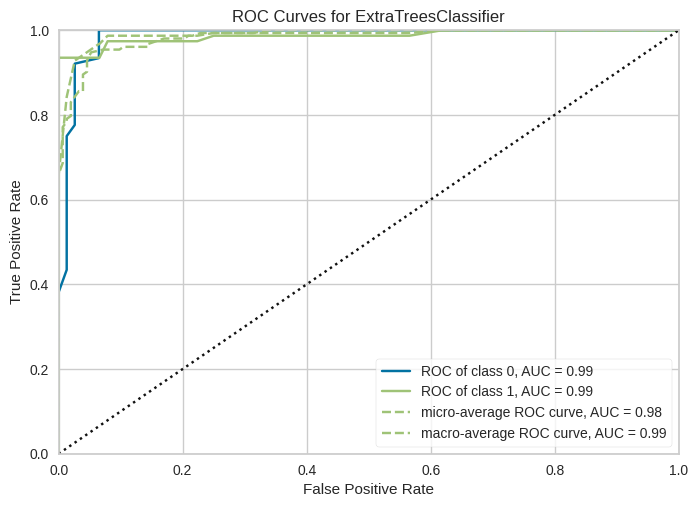

In [ ]:
plot_model(et, plot = 'auc')

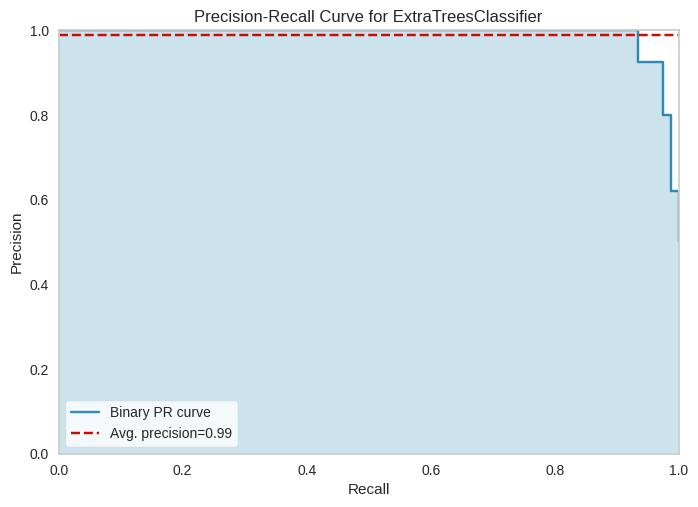

In [ ]:
plot_model(et, plot = 'pr')

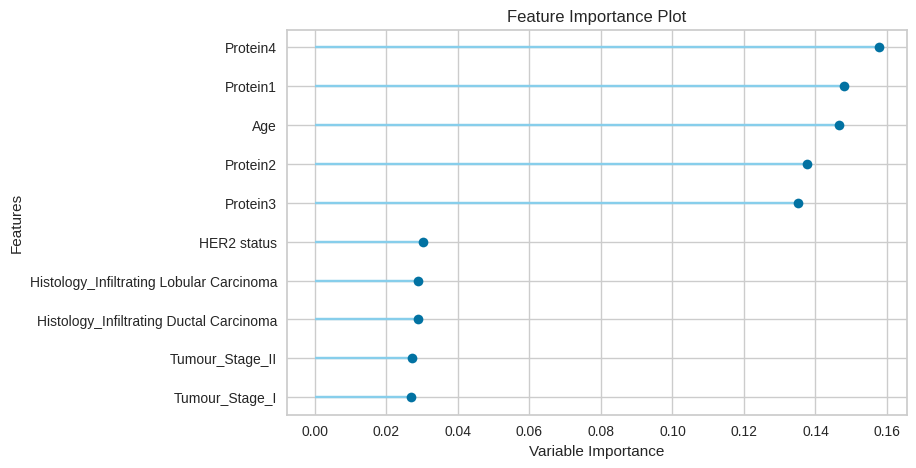

In [ ]:
plot_model(et, plot='feature')

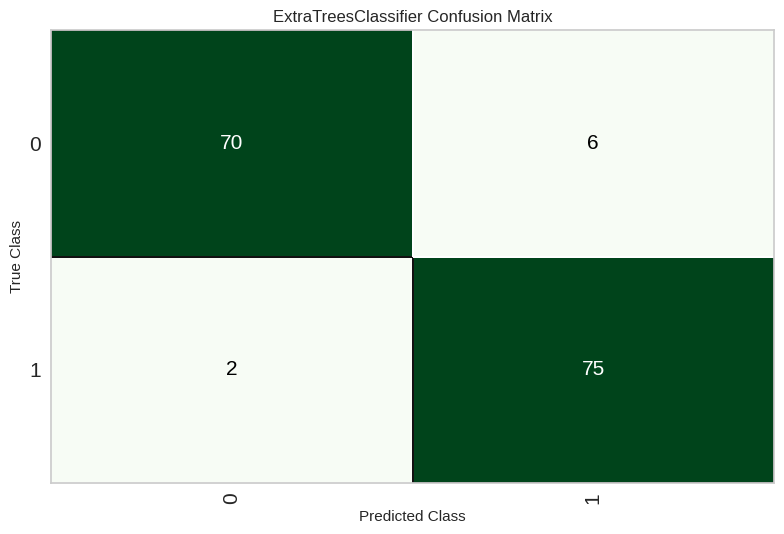

In [ ]:
plot_model(et, plot = 'confusion_matrix')

In [ ]:
df.head()
#df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [ ]:
df.shape
#df2.head()

(317, 11)

In [ ]:
unseen_predictions = predict_model(et, data = df2)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9843,0.9988,0.9843,0.9844,0.9843,0.9686,0.9687


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.86
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,1.00
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,1.00
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.00
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,1.00
